# M1 - House Price Prediction

## 1 - Exploratory Data Analysis

In [131]:
# Importing the standard libraries:
import pandas as pd # For working with tabular data and reading the csv files.
import numpy as np # For working with numerical data and statistics. 
import seaborn as sns # For visualization of the data.
import matplotlib.pyplot as plt # For plot control

# Initializing the seaborn plot style:
sns.set()

The data we are going to work with is from the Kaggle Competition: "House Prices - Advanced Regression Techniques".

Found at: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [132]:
# Importing the training and testing data:
data = pd.read_csv('https://raw.githubusercontent.com/STLinde/AAU-SDS/main/train.csv')

# Ensuring that the data is stored as DataFrames:
df = pd.DataFrame(data)

In [4]:
# Inspecting the training data:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As can be seen in the above we have 81 columns, where the first is an ID column which can be dropped and the last is the outcome column `SalePrice`. Furthermore, by the preview we can see that there are a lot of columns with `NaN` values. 

In [5]:
# Dropping the ID column.
if 'Id' in df.columns:
    house_id = df['Id']
    df = df.drop(columns=['Id'])

In [6]:
# Inspecting the columns with numeric data types:
df.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [7]:
# Inspecting the columns with object data types: 
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As can be seen from the above two subsamples of the dataset we have 37 numeric columns and 43 object (string) columns. However, we can tell from the data description that some of the numeric columns are categorical, and it can be seen in the numeric subsample that some of the columns are year and month variables. 

Based on the data description we have the following numeric, categorical and date features:

In [8]:
# Creating a variable with the categorical features
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                       'MiscFeature', 'SaleType', 'SaleCondition']

In [9]:
# Creating a variable with the numerical features
numerical_features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                     '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                     'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                     'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
                     'YrSold', 'SalePrice']

In [10]:
# Calculating the total number of null values in all columns which have null values.
df[df.columns[df.isnull().sum() > 1]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Instead of just filling null values with arbitrary N/A or 0 values we'll make a decision on what to fill them with based on the data description. Either the mean, most frequent or N/A label. Most often the missing value in a feature refers to that not being applicable. For instance `GarageCond`, here null values mean that there is no garage. Thus, most of the columns will be filled with N/A.

In [11]:
null_to_mean = ['LotFrontage']
null_to_na = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
             'MasVnrType', 'MasVnrArea', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
              'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']

Now we are ready to clean the data. We'll define a function `data_cleaner` which takes the dataframe as input ensures proper datatypes and cleans the features.

In [12]:
def data_cleaner(df):
    """data_cleaner ensures proper datatypes and fills missing values."""
    
    for feature in df.columns:
        if feature in numerical_features:
            if df[feature].isnull().sum() > 0:
                if feature in null_to_mean:
                    df[feature].fillna(value=df[feature].mean(), inplace=True)
                    df[feature] = df[feature].astype(np.int64)
                    
                else:
                    df[feature].fillna(value=0, inplace=True)
                    df[feature] = df[feature].astype(np.int64)

        if feature in categorical_features:
            if df[feature].isnull().sum() > 0:
                if feature in null_to_mean:
                    df[feature].fillna(value=df[feature].mean(), inplace=True)
                    df[feature] = df[feature].astype('str')
                    
                elif feature in null_to_na:
                    df[feature].fillna(value='N/A', inplace=True)
                    df[feature] = df[feature].astype('str')

In [13]:
# Running the data_cleaner on our dataframe. 
data_cleaner(df)

In [14]:
# Inspecting the dataframe to ensure it looks right. 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,N/A,Reg,Lvl,AllPub,Inside,...,0,N/A,N/A,N/A,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,N/A,Reg,Lvl,AllPub,FR2,...,0,N/A,N/A,N/A,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,N/A,IR1,Lvl,AllPub,Inside,...,0,N/A,N/A,N/A,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,N/A,IR1,Lvl,AllPub,Corner,...,0,N/A,N/A,N/A,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,N/A,IR1,Lvl,AllPub,FR2,...,0,N/A,N/A,N/A,0,12,2008,WD,Normal,250000


In [15]:
# Lets double check we have any columns with missing values:
(len(df[df.columns[df.isnull().sum() > 1]].isnull().sum()) == 0)

True

Now that our data is somewhat sorted, let's move on to getting a better understanding of how the various numerical features are correlated with the target `SalePrice`.

<AxesSubplot:>

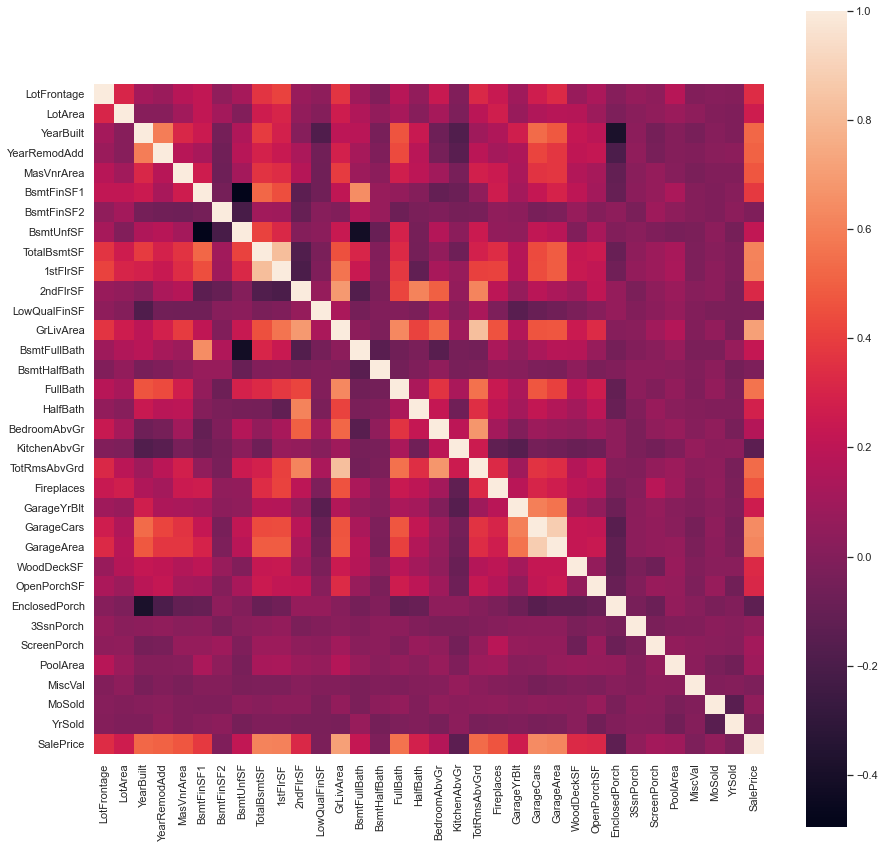

In [16]:
# Defining a variable that holds the correlation matrix for our numerical features.
correlations = df[numerical_features].corr()

# Plotting the correlation matrix as a heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True)

We can see from the above heatmap that we have two variables that are very strongly correlated, which may imply multicolinierty. `TotalBsmtSF` and `1stFlrSF` have a strong correlation, and `GarageCars`and `GarageArea` have a strong correlation. Based on this we might drop one of the features of both pairs, as the information that our models will receive from the features are close to identical. We will determine which one based on the correlation with `SalePrice`.

Now let's inspect the correlations of the features with the `SalePrice`. 

In [17]:
# Retrieving the correlations of the numerical features with SalePrice.
correlations['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334897
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

As can be seen above, the numerical features that has the highest correlation with `SalePrice` is:
1. `GrLivArea`: Above grade (ground) living area in square feet.
2. `GarageCars`: Size of the garage in car capacity.
3. `GarageArea`: Size of the garage in square feet.
4. `TotalBsmtSF`: Total square feet of basement area.
5. `1stFlrSF`: First floor square feet.

Based on the fact that `GarageCars` and `GarageArea` are collinear (the number of cars in the garage depends on the garage area) we will drop `GarageArea` as `GarageCars` have a higher correlation with the `SalePrice`.

In [18]:
# Dropping the GarageArea feature:
if 'GarageArea' in df.columns:
    df = df.drop('GarageArea', axis=1)

Now we will take a closer look at the `SalePrice` against the top 5 most correlated numerical features.

In [19]:
# Defining a list of features with high correlation with sales price for plotting
high_corr = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']

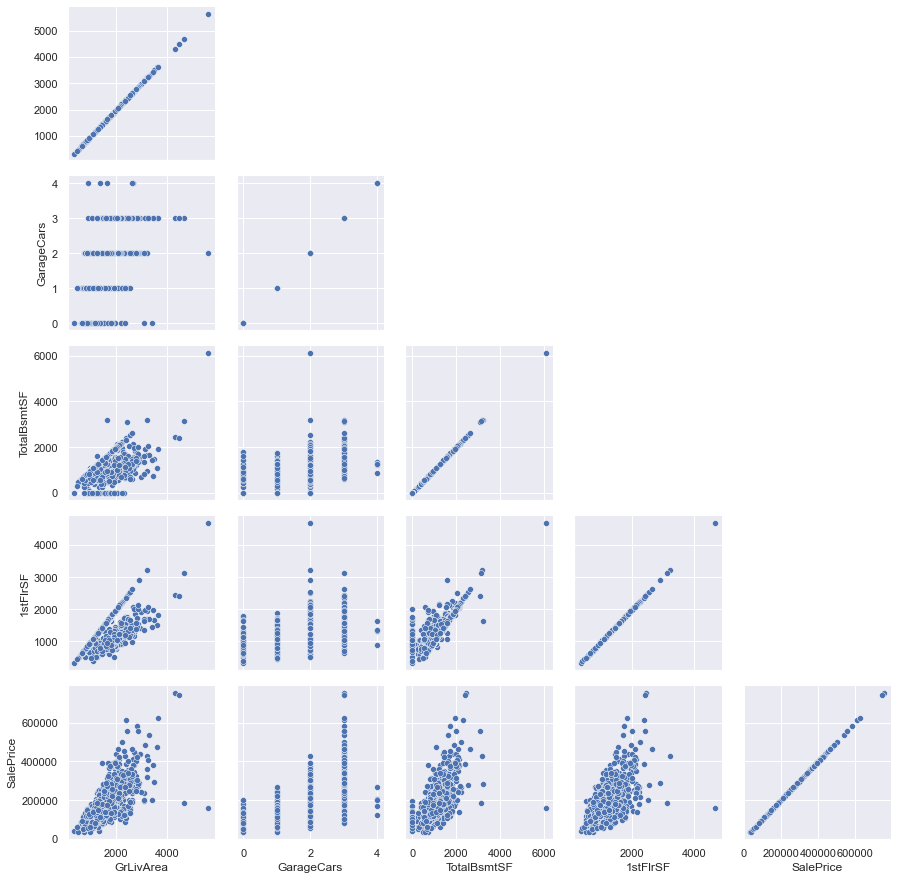

In [20]:
# Creating a pairplot of the high_corr features and mapping scatterplots onto it. 
g = sns.PairGrid(df[high_corr], corner=True)
g.map(sns.scatterplot)

As can be seen from the above scatterplots, all 4 numerical features have a rather good correlation with the `SalePrice`. There does however seem to be an issue with heteroskedasticity. Let's take a deeper look at the distribution of `SalePrice`. First we'll inspect some key statistics and secondly review a QQ-plot of the `SalePrice`.

In [68]:
# Importing the necessary library:
import scipy.stats as stats

In [69]:
# Computing key statistics of the Sale Price: 
df['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

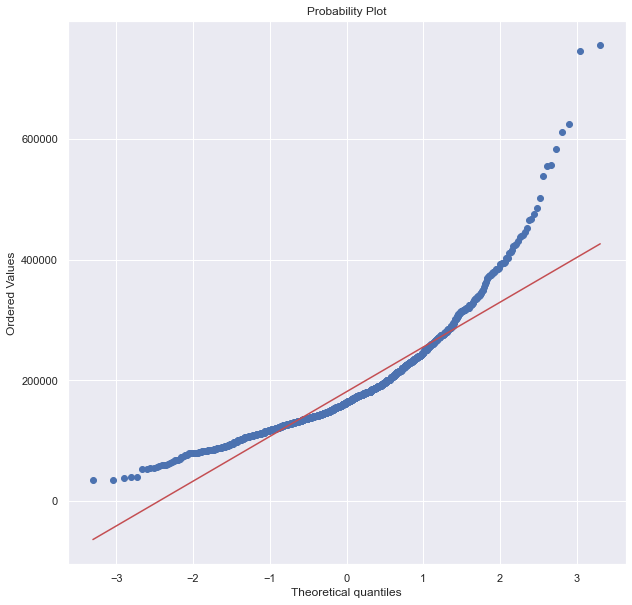

In [22]:
# Creating the QQ-plot
plt.figure(figsize=(10,10))
stats.probplot(df['SalePrice'], dist='norm', plot=plt)

The above QQ-plot shows nonlinear tendencies when compared to the theoretical quantiles. To alleviate this problem we can try to take the log-values of the `SalePrice`.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.39826223081618867, 12.024050901109383, 0.9953761475636614))

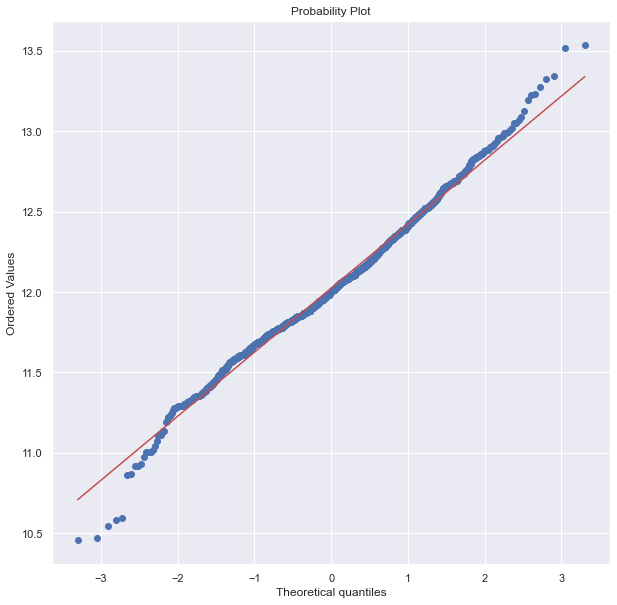

In [23]:
# Computing the log-saleprice
log_saleprice = np.log(df['SalePrice'])

# Plotting the QQ-plot again: 
plt.figure(figsize=(10,10))
stats.probplot(log_saleprice, dist='norm', plot=plt)

This looks quite a lot better. We can however see that there are still datapoints which falls outside the theoretical quantiles. This migt pose an issue later in our supervised learning, as the data points are outside what would be expected from normally distributed data. 

Now let's inspect the pairplot again with the transformed sales price.

In [24]:
# Adding the log_saleprice to our df: 
df['LogSalePrice'] = log_saleprice

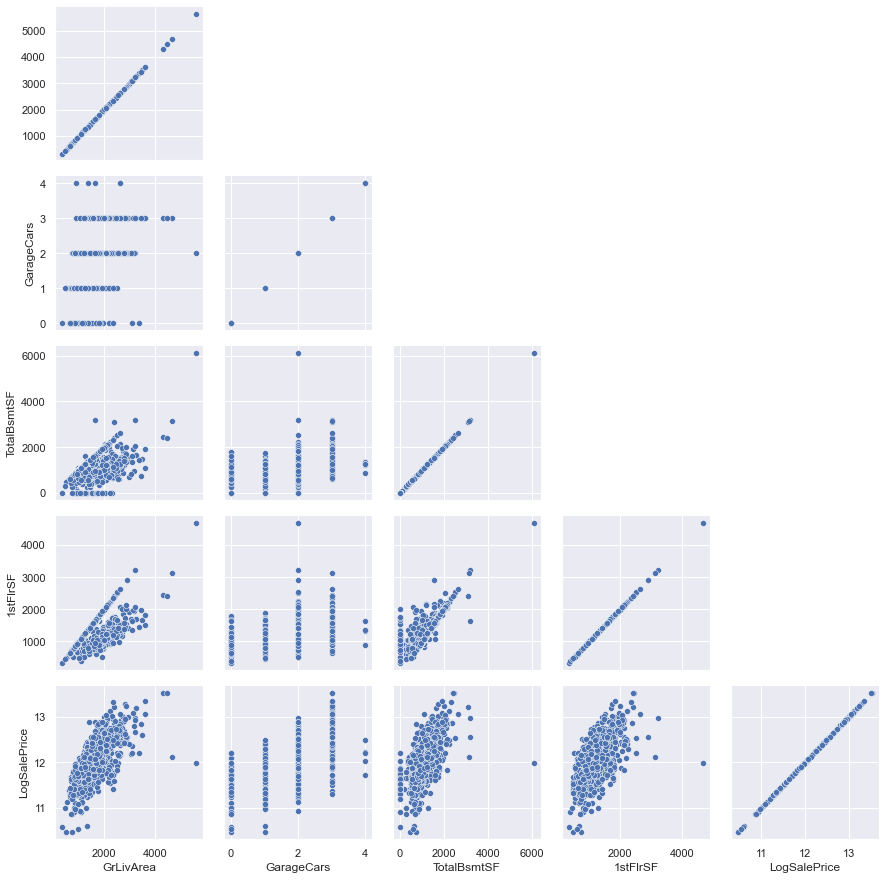

In [25]:
# Plotting the pairplot again with the LogSalePrice instead of SalePrice:
high_corr = ['GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'LogSalePrice']

g = sns.PairGrid(df[high_corr], corner=True)
g.map(sns.scatterplot)

This looks better. The scatterplots are no longer cone shaped, which imply that the variance is somewhat stationary. 

There are however still an issue with a couple of outliers is `GrLivArea`, the two houses with highest GrLivArea have a very low `SalePrice`. Let us take a look at the influence of these on the correlation between `LogSalePrice` and `GrLivArea`.

In [26]:
# Correlation between GrLivArea and LogSalePrice before removal: 
df['LogSalePrice'].corr(df['GrLivArea'])

0.7009266525441297

In [27]:
# Which two houses to remove: 
df['GrLivArea'].sort_values(ascending=False)[:2]

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [28]:
# Removing the two houses
df = df[df['GrLivArea'] < 4676]

In [29]:
# Correlation between GrLivArea and LogSalePrice after removal: 
df['LogSalePrice'].corr(df['GrLivArea'])

0.7252109721015866

This seems to increase the correlation quite a bit. Let's take one last look at the pairplot. 

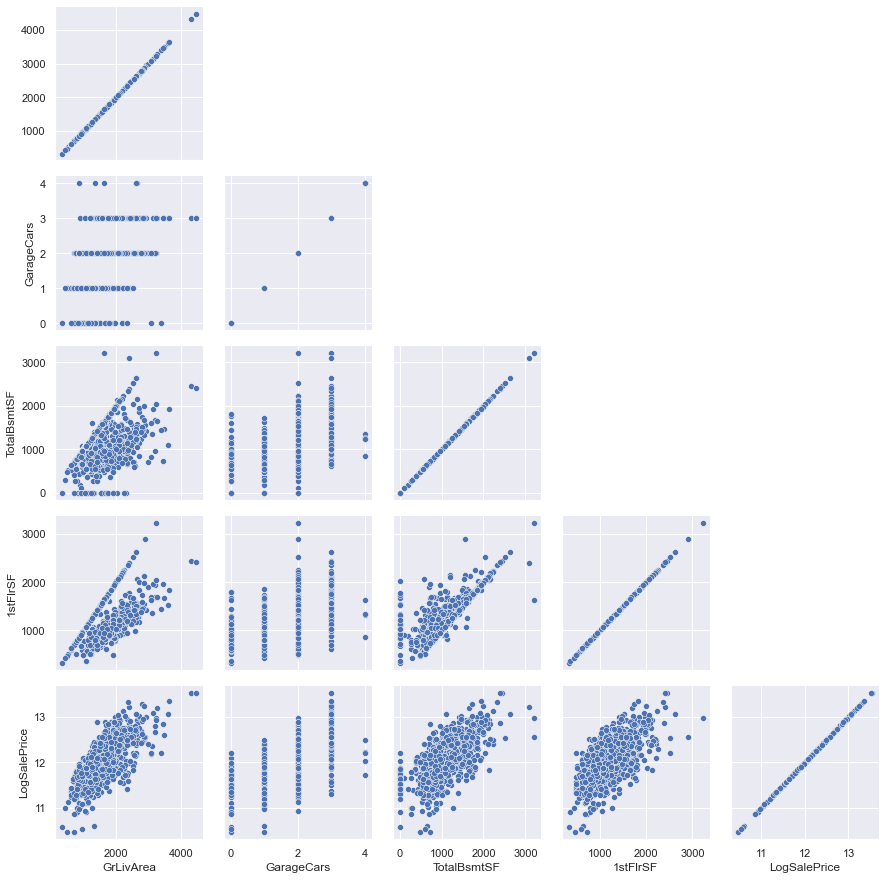

In [30]:
# Plotting the pairplot again:
g = sns.PairGrid(df[high_corr], corner=True)
g.map(sns.scatterplot)

## 2 - Feature Engineering

Now that the we have an idea of the relationships that `SalePrice` has with the numerical features, let's move on to feature engineering, that is the creation of new features and manipulation of existing features. 

The major part of the feature engineering will be taking place on the categorical features. The ML algorithms that we'll be working with are not able to handle string values. Thus, we'll need to encode our categorical features into numerical dtypes. First, we'll use the sklearn class `OrdinalEncoder` (1) to encode our categorical features in the same column. This raises the issue that our ML algos will interpret the numerical values of the encoded categorical features as meaningful, that is, that the order is meaningful. This might not be the case for all our categorical features. Thus, for the ones where the order of the categorical values are not important, we will use the pandas function `get_dummies` (2) to split the categorical values into binary columns, where one column refers to one value of the categorical feature. If we needed to train our data on one set of data and test it on another we might have needed to use the sklearn class `OneHotEncoder` (3), to ensure that the encoding structure were cached. But as we are preparing all the data at the same time, we can use `get_dummies`.


1: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
2: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
3: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [31]:
# Defining the categorical features where order is important.
ordr_imp = ['Utilities', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional',
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

ordr_unimp = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
             'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
             'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature',
             'SaleType', 'SaleCondition']

In [32]:
# Importing the sklearn class OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# Instantiating an OrdinalEncoder instance: 
ord_enc = OrdinalEncoder()

In [33]:
# Fitting the categorical features of our dataframe with our OrdinalEncoder object:
df[ordr_imp] = ord_enc.fit_transform(df[ordr_imp])

In [34]:
# Inspecting the dataframe after fit_transforming the categorical features. 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,60,RL,65,8450,Pave,N/A,Reg,Lvl,0.0,Inside,...,3.0,4.0,N/A,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80,9600,Pave,N/A,Reg,Lvl,0.0,FR2,...,3.0,4.0,N/A,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68,11250,Pave,N/A,IR1,Lvl,0.0,Inside,...,3.0,4.0,N/A,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60,9550,Pave,N/A,IR1,Lvl,0.0,Corner,...,3.0,4.0,N/A,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84,14260,Pave,N/A,IR1,Lvl,0.0,FR2,...,3.0,4.0,N/A,0,12,2008,WD,Normal,250000,12.429216


From the data description we can tell which in which categorical features the order is important. 

In [35]:
df = pd.get_dummies(df).reset_index(drop=True)
df.shape

(1458, 234)

In [36]:
df.head()

,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,0.0,6.0,4.0,2003,2003,196,2.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,0.0,5.0,7.0,1976,1976,0,3.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,0.0,6.0,4.0,2001,2002,162,2.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,0.0,6.0,4.0,1915,1970,0,3.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,0.0,7.0,4.0,2000,2000,350,2.0,...,0,0,0,1,0,0,0,0,1,0


Now that we've transformed all the categorical features, we can move on to creating our training and testing datasets. We will be scaling our X_train and X_test dataframes to ensure that the features are centered and have unit variance. 

We are scaling our input features as some of the ML algorithms are very sensitive to feature scaling. The specific ML algorithms that we are working with which are sensitive to scaling is K-Means, PCA, Support Vector Regression, Ridge Regression, Kernel Ridge Regression and LASSO. 

In [37]:
# Importing and instantiating the sklearn class StandardScaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
# Importing the sklearn function train_test_split. 
from sklearn.model_selection import train_test_split

In [39]:
# Defining the X dataset:
X = df[df.columns.difference(['LogSalePrice', 'SalePrice'])]

#Saving the column names from the X dataset:
X_cols = df[df.columns.difference(['LogSalePrice', 'SalePrice'])].columns

# Defining our target feature (y):
y = df['LogSalePrice']

# Scaling our X values:
scaled_X = scaler.fit_transform(X)

# Defining our X_train, X_test, y_train, y_test datasets. 
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2)

# Let's convert the X_train and X_test datasets to DataFrames.
X_train, X_test = pd.DataFrame(X_train, columns=X_cols), pd.DataFrame(X_test, columns=X_cols)

In [40]:
# Inspecting the X_train df: 
X_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_N/A,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.712134,-0.794354,-0.11642,-0.188445,0.25801,-0.170101,0.163894,0.443897,-0.14739,-0.192313,...,-0.270407,-0.064282,0.064282,-0.935399,-0.382164,-0.026198,2.162015,0.158428,-0.428115,1.643980
1,-0.394855,0.993024,-0.11642,-0.188445,0.25801,-0.170101,1.389320,0.443897,-0.14739,-0.192313,...,2.365242,-0.064282,0.064282,0.921812,-0.772676,-0.026198,0.430268,0.025905,-0.621964,-1.367230
2,1.309850,-0.794354,-0.11642,-0.188445,0.25801,-0.170101,0.163894,0.443897,-0.14739,-0.192313,...,-0.270407,-0.064282,0.064282,0.302742,1.411298,-0.026198,0.781406,1.185483,1.122672,0.138375
3,-0.150173,-0.794354,-0.11642,-0.188445,0.25801,-0.170101,-1.061532,0.443897,-0.14739,-0.192313,...,-0.270407,-0.064282,0.064282,-0.935399,0.121644,-0.026198,0.573915,-1.531243,-0.234267,-1.367230
4,-0.405610,-0.794354,-0.11642,-0.188445,0.25801,-0.170101,1.389320,0.443897,-0.14739,-0.192313,...,-0.270407,-0.064282,0.064282,0.302742,-0.107360,-0.026198,-0.750831,-1.498112,-1.688130,-1.367230


Our `X_train` DataFrame has the correct number of columns and let's ensure that all columns are with mean zero and unit variance: 

In [41]:
X_train.describe()[1:3]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_N/A,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,...,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
mean,0.012080,-0.009447,0.018306,0.009490,-0.011433,0.006284,0.005199,-0.004778,-0.016596,0.015789,...,0.013637,0.002701,-0.002701,0.006480,0.007568,0.006561,0.031337,0.009794,0.021593,0.005376
std,1.007005,0.999154,1.090535,1.024393,1.020846,1.018195,1.003629,1.004732,0.943576,1.039106,...,1.021662,1.021145,1.021145,1.009032,1.020763,1.118609,1.031118,1.009262,0.992709,0.998512


All our features in `X_train` is now in the same scale with ~0 mean and approximately unit variance. This is needed for fx PCA analysis and LASSO.

Now that we have our training and testing datasets set up as we want, we can move on to the unsupervised learning and clustering. The goal of the next section is to get a better understanding of our features, and potentially discover underlying structures or relationships of our data. 

## 3 - Unsupervised Learning

### 3.1 - Dimensionality Reduction

Firstly we'll use PCA to do dimensionality reduction of our `X_train` dataset. The goal of this is to try to reduce the number of dimensions of our dataset, and ideally discover previously unknown structures in our dataset. For the PCA to make sense, we must have a high cumulative explained variance ratio. If the cumulative explained variance ratio is low, the PCA components does not explain the variance of our dataset very well. Thus, the differences between the houses are not embedded completely by our PCA componenets and we have a large loss of information. Let's set the goal of the cumulative explained variance ratio at 90 %. 

In [42]:
# Importing the PCA class from sklearn
from sklearn.decomposition import PCA

# Instantiating an object of the PCA class: 
pca = PCA(n_components=5)

In [43]:
# Applying the PCA object to our X_train dataset: 
pca.fit(X_train)

PCA(n_components=5)

In [78]:
# Inspecting the cumulative explained variance ratio: 
print(pca.explained_variance_ratio_)
print(f"The sum of the explained varaince of our five compenents is: {pca.explained_variance_ratio_.sum()}")

[0.06156853 0.0335346  0.02591252 0.022264   0.01906069]
The sum of the explained varaince of our five compenents is: 0.16234034996804056


As can be seen above 5 components account for only 16,5 % of the variance in our dataset. Thus, there are no clear structure in our dataset that implies that the houses can be classified by 5 archetypes. Let's compute how many PCA components are needed for our PCA to yield a cumulative explained variance ratio of above 90 %. 

In [45]:

pca_cum_var = 0
n_components = 1

while pca_cum_var < 0.9:
    n_components += 1
    pca_2 = PCA(n_components = n_components)
    pca_2.fit(X_train)
    pca_cum_var = pca_2.explained_variance_ratio_.sum()

pca_X_train = pca_2.fit_transform(X_train)
print(f"For our PCA to have a cumulative explained variance above 90 % it needs at least {n_components} components.")

For our PCA to have a cumulative explained variance above 90 % it needs at least 123 components.


It seems that the matrix factorization made by the PCA is not optimal for reducting the dimensions of our `X_train` features. However let's try to visualize the first two components and color them by our `LogSalePrice`:

<AxesSubplot:>

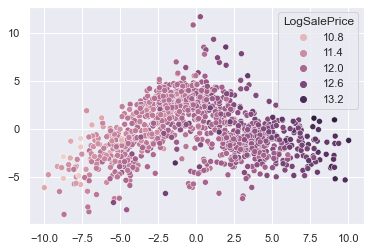

In [46]:
sns.scatterplot(x=pca_X_train[:, 0], y=pca_X_train[:, 1], hue=y_train)

The above plot shows us that the first PCA component has a rather good correlation with the `LogSalePrice`. There are however some inconsistencies. The second component does not seem to tell us that much about the `LogSalePrice` as high prices can be seen both at high and low values of the second PCA component. 

The above dimensionality reduction techniques are based on matrix factorization, that is factoring the `X_train` matrix into representations and archetypes, optimizing this factorization in some way. Now we will move on to dimensionality reduction techniques based on graph theory, that is the techniques we are going to implement now, will be based on building a neighbor graph of our `X_train` dataset and reducing it to lower dimensions. 

First we will use UMAP (Uniform Manifold Approximation & Projection) to try to uncover hidden structures in our dataset. 

In [47]:
# Importing the UMAP class from the umap library: 
import umap.umap_ as umap

# Instantiating an object of the UMAP class: 
reducer = umap.UMAP()

In [48]:
# Training and transforming our X_train dataset using our reducer object:
embedded = reducer.fit_transform(X_train)

<AxesSubplot:>

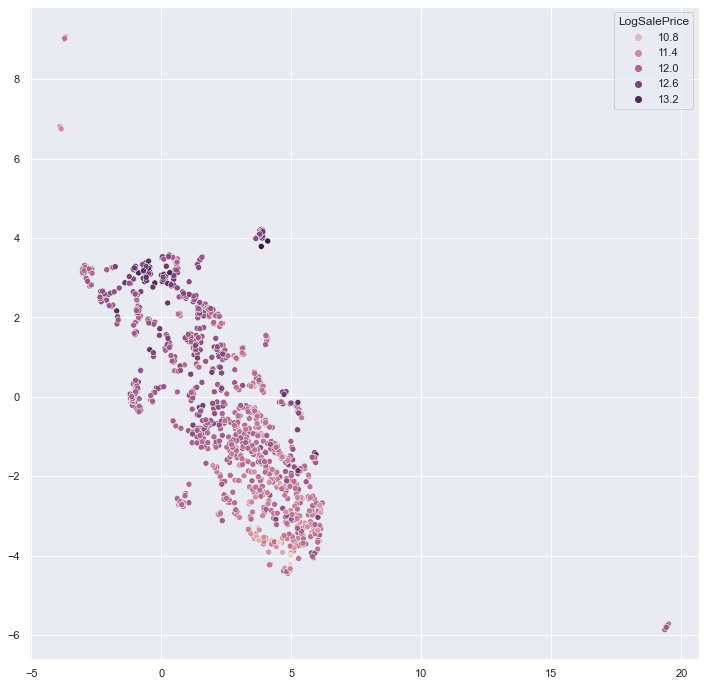

In [49]:
# Plotting the UMAP projection of our X_train dataset with LogSalePrice as hue: 
plt.figure(figsize=(12,12))
sns.scatterplot(x=embedded[:, 0], y=embedded[:, 1], hue=y_train)

As can be seen above the UMAP dimensionality reduction did not yield any clear clusters or patterns in our `X_train` dataset.

### 3.2 - Clustering

Moving on to clustering, we will try to compute stable clusters within our data. The clusters will be computed using K-Means which is an algorithm that builds clusters based on the squared euclidean distance between the datapoints. 

In [50]:
# Importing the class AgglomerativeClustering from sklearn
from sklearn.cluster import KMeans

# Importing the KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

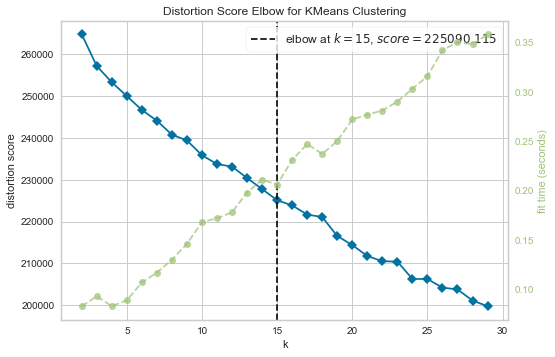

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model = KMeans()

# Instantiating the visualizer with k being the range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=True)
visualizer.fit(X_train)
visualizer.show()

<AxesSubplot:>

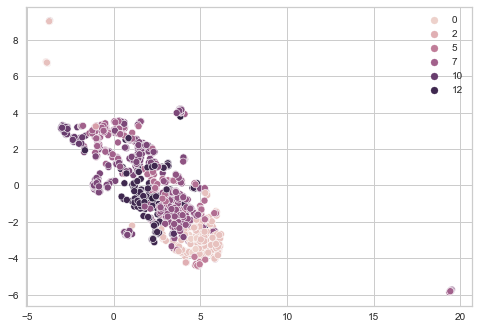

In [82]:
# Plotting the first two UMAP components, with the 14 clusters.
clusterer = KMeans(n_clusters=14).fit(X_train)
sns.scatterplot(x=embedded[:,0], y=embedded[:,1], hue = clusterer.labels_ )

<AxesSubplot:>

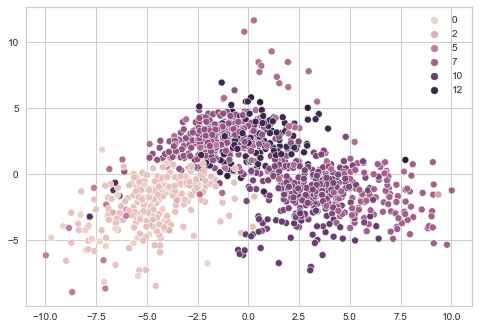

In [83]:
# Plotting the first two PCA components, with the 14 clusters.
clusterer = KMeans(n_clusters=14).fit(X_train)
sns.scatterplot(x=pca_X_train[:,0], y=pca_X_train[:,1], hue = clusterer.labels_ )

The clusters determined by the elbow visualizer does not seem to be persistent and clear. Let's try with fewer clusters.

<AxesSubplot:>

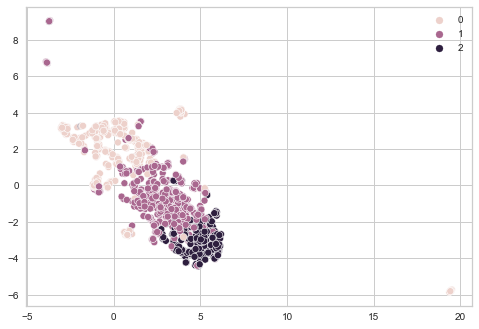

In [81]:
# Plotting the first two UMAP components with the 3 clusters. 
clusterer = KMeans(n_clusters=3).fit(X_train)
sns.scatterplot(x=embedded[:,0], y=embedded[:,1], hue = clusterer.labels_ )

<AxesSubplot:>

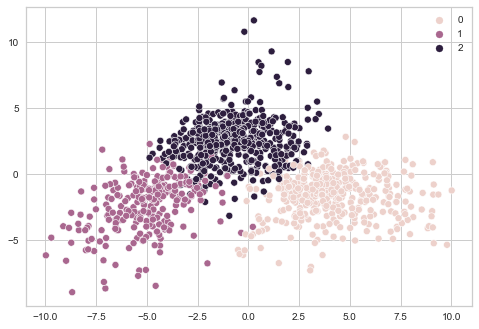

In [86]:
# Plotting the first two PCA components, with the 3 clusters.
clusterer = KMeans(n_clusters=3).fit(X_train)
sns.scatterplot(x=pca_X_train[:,0], y=pca_X_train[:,1], hue = clusterer.labels_ )

As can be seen above the same result persists from the dimensionality reduction. In the elbow visualization we can see that there are not clear elbow, and thus no clear way for us to determine the optimal number of clusters. There does however seem to be clusters in the visualization with UMAP and PCA features, but again they are overlapping and does not seem to be clearly  distinct.

### 3.3 - Unsupervised Learning Conclusion

Our unsupervised learning shows that using dimensionality reduction techniques such as PCA and UMAP we can reduce the dimensionality of our dataset. However, to achieve a cumulative explained variance ratio of above 90 % we need 122 clusters, and thus, the underlying patterns in our dataset does not seem to be very clear. This might show that the houses in our dataset are quite distinct from one another and that there are no clear house categories that we might build our intuition on. 

## 4 - Supervised Machine Learning

Now we will move on to supervised learning with the goal of implementing different models predicting the `LogSalePrice` of the houses, and evaluating the supervised learning algorithms.

We will implement the following different models and perform hyperparameter tuning using `GridSearchCV`: 
* XGBoost Regression (`XGBRegressor`)
* RandomForest (`RandomForestRegressor`)
* Support Vector Regressor (`SVR`)
* Ridge Regressor (`RidgeCV`)
* Kernel Ridge Regressor (`KernelRidge`)
* LASSO (`Lasso`)

We will evaluate our models using k-fold crossvalidation based on both RMSE (root-mean-squared-error) and MAE (mean-absolute-error). To be able to do this we will need to split our training dataset into 5 folds, using 1 for validation and 4 for training.


The above supervised learning algorithms are chosen based on the following reasons:
* XGBoost Regression: Very popular supervised learning algorithm which works based on gradient boosting. (1)
* RandomForest: A supervised learning algorithm which is based on learning through construction of a 'forest' of multiple decision trees. (2)
* Support Vector Regressor: A supervised learning algorithm which trains and predicts by constructing hyperplanes. (3)
* Ridge Regressor: A supervised learning function that is alike OLS but minimizing the objective function $||y - Xw||^2_2 + \alpha ||w||^2_2$ (4)
* Kernel Ridge Regressor: An extension of ridge regression built on top of a kernel. The interesting thing is that it is equal to the Support Vector Regressor, but optimizing for different loss functions. (5)
* LASSO: Again like the ridge regression but optimizing the function $\frac{1}{2*n}*||y-Xw||^2_2 +\alpha||w||_1$ (6)

As can be seen the learning algorithms chosen are from four different categories, but with different optimization functions, and thus, the interesting thing is to see which ones are best at predicting the house prices. 


1:https://xgboost.readthedocs.io/en/latest/python/python_api.html

2:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

3:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

4:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

5:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

6:https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

In [54]:
# Importing the necessery libaraies:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR # Importing the Support Vector Regressor class. 
from sklearn.linear_model import Lasso # Importin the Lasso class
from sklearn.ensemble import RandomForestRegressor # Importing the Random Forest Regressor class.
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
import lightgbm as lgb

Fistly we will set up our cross validation scoring technique. We will make one both for RMSE and MAE. 

In [55]:
# Defining the number of folds in our cross validation: 
n_folds = 5

In [56]:
# Defining the RMSE scoring function: 
def rmse_cv(ml_model): 
    k_fold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(ml_model, X_train.values, y_train, scoring ='neg_mean_squared_error', cv = k_fold))
    return rmse

In [57]:
# Defining the MAE scoring function. 
def mae_cv(ml_model): 
    k_fold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse = np.sqrt(-cross_val_score(ml_model, X_train, y_train, scoring ='neg_mean_absolute_error', cv = k_fold))
    return rmse

### 4.1 - Training and Evaluation of Base Models

Now with the scoring methods setup, let's implement our base models:

In [58]:
# Implementing the base XGBoost Regressor: 
xgbr = XGBRegressor()

In [59]:
# Implementing the base LASSO regressor
lasso = Lasso()

In [60]:
# Implementing the base Random Forest Regressor: 
random_forest_regressor = RandomForestRegressor()

In [61]:
# Implementing the base Support Vector Regressor:
svr = SVR()

In [62]:
# Implementing the base Ridge
ridge = Ridge()

In [63]:
# Implementing the base Kernel Ridge with a polynomial kernel:
kernel_ridge = KernelRidge(kernel='polynomial')

Now we'll move to training and scoring our base models. To do that we set up a simple for loop, looping over all our models.

In [118]:
# Defining our list of models: 
kernels = [xgbr, lasso, random_forest_regressor, svr, ridge, kernel_ridge]

# Creating dataframe with ModelName, RMSEMean, RMSEStd, MAEMean, MAEStd
scores = pd.DataFrame(columns=['KernelName', 'RMSEMean', 'RMSEStd', 'MAEMean', 'MAEStd'])

scores['KernelName'] = ['XGBRegression', 'LASSO', 'RandomForestRegression', 'Support Vector Regression',
                       'Ridge Regression', 'Kernel Ridge Regression']
scores

,KernelName,RMSEMean,RMSEStd,MAEMean,MAEStd
0,XGBRegression,NaN,NaN,NaN,NaN
1,LASSO,NaN,NaN,NaN,NaN
2,RandomForestRegression,NaN,NaN,NaN,NaN
3,Support Vector Regression,NaN,NaN,NaN,NaN
4,Ridge Regression,NaN,NaN,NaN,NaN
5,Kernel Ridge Regression,NaN,NaN,NaN,NaN


In [119]:
# Training and scoring each of our models
for i in range(len(kernels)):
    kernel_rmse = rmse_cv(kernels[i])
    kernel_mae = mae_cv(kernels[i])
    scores.iloc[i, 1] = kernel_rmse.mean()
    scores.iloc[i, 2] = kernel_rmse.std()
    scores.iloc[i, 3] = kernel_mae.mean()
    scores.iloc[i, 4] = kernel_mae.std()

scores

,KernelName,RMSEMean,RMSEStd,MAEMean,MAEStd
0,XGBRegression,0.142848,0.007751,0.314427,0.008122
1,LASSO,0.40278,0.013306,0.556575,0.008264
2,RandomForestRegression,0.145379,0.006001,0.316622,0.005795
3,Support Vector Regression,0.202327,0.014471,0.351385,0.012485
4,Ridge Regression,0.134753,0.006924,0.304324,0.010318
5,Kernel Ridge Regression,0.144715,0.009686,0.318203,0.006284


<AxesSubplot:title={'center':'RMSEMean of Base Models'}, xlabel='KernelName', ylabel='RMSEMean'>

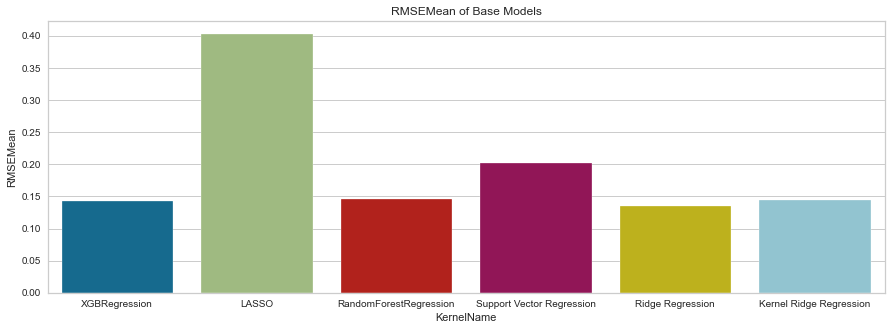

In [120]:
# Plotting the RMSEMean
plt.figure(figsize=(15,5))
plt.title('RMSEMean of Base Models')
sns.barplot(x='KernelName', y='RMSEMean', data=scores)

<AxesSubplot:xlabel='KernelName', ylabel='MAEMean'>

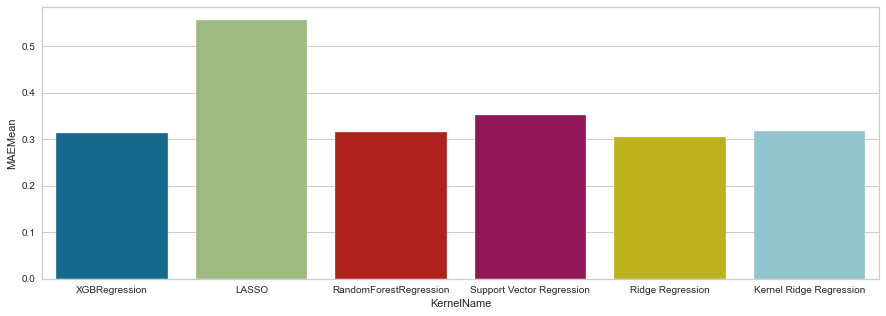

In [74]:
# Plotting the MAEMean
plt.figure(figsize=(15,5))
sns.barplot(x='KernelName', y='MAEMean', data=scores)

As can be seen above from the mean RMSE and mean MAE of our 6 models, our RidgeRegression model is performing the best with mean RMSE of 0.133505. These scores are rather fine, but come from base models, let's see if we can improve them by performing hyperparameter tuning. 

Our hyperparameter tuning will be done using the sklearn classes `GridSearchCV` (1) and `RandomizedSearchCV` (2). `GridSearchCV` searches over all possible models based on the hyperparameters given by us to find the lowest MSE. `RandomizedSearchCV` searches over a specified number of randomly chosen subsets of the hyperparametes given by us to find the lowest MSE.

Some ML algorithms have longer runtimes as others due to their CPU requirements, memory requirements and their algorithmic complexity. Thus, we will be implementing `GridSearchCV` where the runtime is reasonable and `RandomizedSearchCV` where the runtime is somewhat slow.

1: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

2: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV

In [87]:
# Importing the GridSearchCV and RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 4.1 - Hyperparameter Tuning

Now we need to define the hyperparameters we want to tune for the different models:

In [350]:
# Hyperparameter for XGBRegression

xgbr_max_depth = [int(x) for x in np.linspace(3, 10, num=4)]
xgbr_n_estimators = [int(x) for x in np.linspace(100, 1000, num = 3)]
xgbr_learning_rate = [float(x) for x in np.linspace(0.1, 0.3, num=3)]
xgbr_colsample_bytree = [float(x) for x in np.linspace(0.4, 1.0, num=3)]

xgbr_hparam = {'max_depth': xgbr_max_depth,
               'learning_rate': xgbr_learning_rate,
               'n_estimators': xgbr_n_estimators,
               'colsample_bytree': xgbr_colsample_bytree}

clf = GridSearchCV(estimator=xgbr, 
                   param_grid=xgbr_hparam,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Lowest RMSE:  0.1204657997876189


As seen from the above output the best parameters for our XGBRegressor based on the values inputted are: 
* `colsample_bytree`: 0.4
* `learning_rate`: 0.1
* `max_depth`: 3
* `n_estimators`: 1000

In [377]:
# Hyperparameters for LASSO
lasso_alpha = [x for x in np.arange(0, 0.5, 0.03)]

lasso_hparam = {'alpha': lasso_alpha}

clf = GridSearchCV(estimator=lasso, 
                   param_grid=lasso_hparam,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 17 candidates, totalling 85 fits


C:\Users\Sebastian Linde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Sebastian Linde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sebastian Linde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

Best parameters: {'alpha': 0.03}
Lowest RMSE:  0.14661143616294287


As seen from the above output the best parameters for our LASSO regression based on the values inputted is:

* `alpha`: 0.03

In [76]:
# Hyperparameters for RandomForestRegression

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rfr_hparam = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

clf = RandomizedSearchCV(estimator = random_forest_regressor, 
                        param_distributions = rfr_hparam,
                        n_iter = 50, cv = 3,
                        verbose=2,
                        random_state=42,
                        scoring='neg_mean_squared_error',
                        n_jobs = -1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 76, 'bootstrap': False}
Lowest RMSE:  0.14723960589864568


As seen from the above output the best parameters for our Random Forest Regressor based on the values inputted are:

* `n_estimators`: 800
* `min_samples_split`: 2
* `min_samples_leaves`: 1
* `max_features`: sqrt
* `max_depth`: 76
* `bootstrap`: False

In [77]:
# Hyperparameters for Support Vector Regression
svr_kernels = ['poly', 'rbf', 'sigmoid', 'linear']
svr_C = [0.1, 1, 10, 100]
svr_gamma = [1, 0.1, 0.01, 0.001, 0.0001]

svr_hparam = {'kernel': svr_kernels,
              'C': svr_C,
              'gamma': svr_gamma}

clf = RandomizedSearchCV(estimator = svr, 
                        param_distributions = svr_hparam,
                        n_iter = 50, cv = 3,
                        verbose=2,
                        random_state=42,
                        scoring='neg_mean_squared_error',
                        n_jobs = -1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 10}
Lowest RMSE:  0.12966369941782144


As seen from the above output the best parameters for our Support Vector Regressor based on the values inputted are:

* `kernel`: sigmoid
* `gamma`: 0.0001
* `C`: 10

In [371]:
# Hyperparameters for RidgeRegression
ridge_alpha = [x for x in np.arange(0, 1, 0.01)]

ridge_hparam = {'alpha': ridge_alpha}

clf = GridSearchCV(estimator=ridge, 
                   param_grid=ridge_hparam,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'alpha': 0.99}
Lowest RMSE:  0.13071099461525687


As seen from the above output the best parameters for our Ridge Regression based on the values inputted are:

* `alpha`: 0.99

In [373]:
# Hyperparameters for Kernel Ridge Regression
kridge_alpha = [x for x in np.arange(0, 1, 0.1)]
kridge_degree = [2., 3., 4., 5.]

kridge_hparam = {'alpha': kridge_alpha,
                 'degree': kridge_degree}

clf = GridSearchCV(estimator=kernel_ridge, 
                   param_grid=kridge_hparam,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'alpha': 0.4, 'degree': 2.0}
Lowest RMSE:  0.12288828170769685


As seen from the above output the best parameters for our Kernel Ridge Regression based on the values inputted are:

* `alpha`: 0.4
* `degree`: 2.0

### 4.3 - Training and Evaluation of Tuned Models

Now that we have found the best hyperparameters of the models based on our hyperparameter tuning, we can move on to training and evaluating the models again. 

In [126]:
# Implementing the base XGBoost Regressor: 
xgbr_t = XGBRegressor(n_estimators=1000,
                    max_depth=3,
                    learning_rate=0.1,
                    colsample_bytree=0.4)

# Implementing the base LASSO regressor
lasso_t = Lasso(alpha=0.3)

# Implementing the base Random Forest Regressor: 
random_forest_regressor_t = RandomForestRegressor(n_estimators=800,
                                                min_samples_split=2,
                                                min_samples_leaf=1,
                                                max_features='sqrt',
                                                max_depth=76)

# Implementing the base Support Vector Regressor:
svr_t = SVR(kernel='sigmoid',
          gamma=0.0001,
          C=10)

# Implementing the base Ridge
ridge_t = Ridge(alpha=0.99)

# Implementing tre base Kernel Ridge:
kernel_ridge_t = KernelRidge(kernel='polynomial', alpha=0.4)

Now we'll move to training and scoring our tuned models. To do that we set up a simple for loop, looping over all our models.

In [127]:
# Defining our list of models: 
kernels = [xgbr_t, lasso_t, random_forest_regressor_t, svr_t, ridge_t, kernel_ridge_t]

# Creating dataframe with ModelName, RMSEMean, RMSEStd, MAEMean, MAEStd
scores = pd.DataFrame(columns=['KernelName', 'RMSEMean', 'RMSEStd', 'MAEMean', 'MAEStd'])

scores['KernelName'] = ['XGBRegression', 'LASSO', 'RandomForestRegression', 'Support Vector Regression',
                       'Ridge Regression', 'Kernel Ridge Regression']
scores

,KernelName,RMSEMean,RMSEStd,MAEMean,MAEStd
0,XGBRegression,NaN,NaN,NaN,NaN
1,LASSO,NaN,NaN,NaN,NaN
2,RandomForestRegression,NaN,NaN,NaN,NaN
3,Support Vector Regression,NaN,NaN,NaN,NaN
4,Ridge Regression,NaN,NaN,NaN,NaN
5,Kernel Ridge Regression,NaN,NaN,NaN,NaN


In [128]:
for i in range(len(kernels)):
    kernel_rmse = rmse_cv(kernels[i])
    kernel_mae = mae_cv(kernels[i])
    scores.iloc[i, 1] = kernel_rmse.mean()
    scores.iloc[i, 2] = kernel_rmse.std()
    scores.iloc[i, 3] = kernel_mae.mean()
    scores.iloc[i, 4] = kernel_mae.std()

scores

,KernelName,RMSEMean,RMSEStd,MAEMean,MAEStd
0,XGBRegression,0.125205,0.011861,0.292765,0.009481
1,LASSO,0.38021,0.016172,0.539724,0.010415
2,RandomForestRegression,0.146548,0.011573,0.311759,0.011087
3,Support Vector Regression,0.124634,0.006633,0.297516,0.006762
4,Ridge Regression,0.134761,0.006925,0.304329,0.010321
5,Kernel Ridge Regression,0.14242,0.010045,0.314502,0.006621


<AxesSubplot:title={'center':'RMSEMean of Tuned Models'}, xlabel='KernelName', ylabel='RMSEMean'>

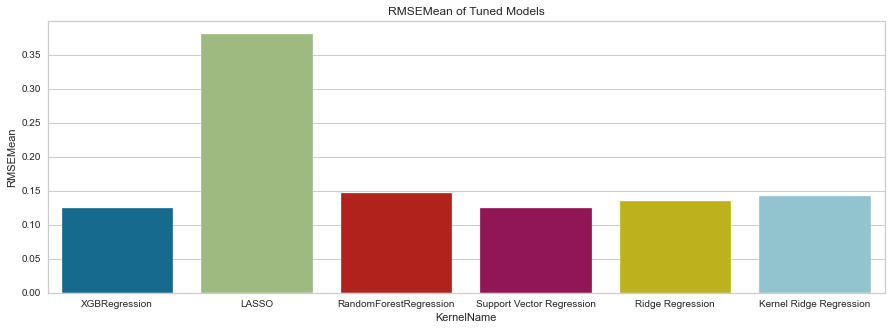

In [129]:
# Plotting the RMSEMean
plt.figure(figsize=(15,5))
plt.title("RMSEMean of Tuned Models")
sns.barplot(x='KernelName', y='RMSEMean', data=scores)

<AxesSubplot:title={'center':'MAEMean Model Performance'}, xlabel='KernelName', ylabel='MAEMean'>

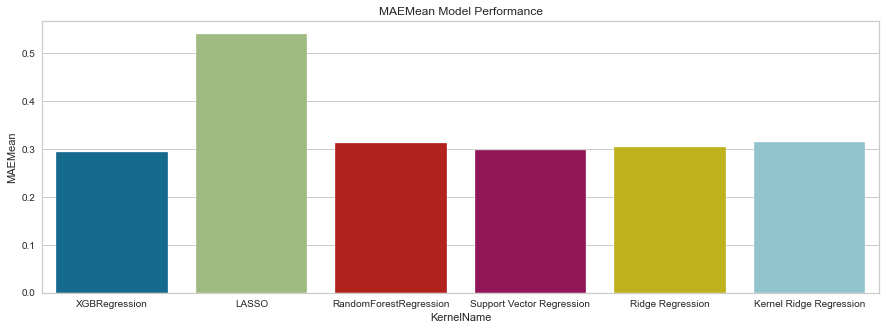

In [130]:
# Plotting the MAEMean
plt.figure(figsize=(15,5))
plt.title('MAEMean Model Performance')
sns.barplot(x='KernelName', y='MAEMean', data=scores)

As we can see the best models are the XGBoost Regressor, the Support Vector Regressor, and the Ridge Regressor. Let' move on to testing these three models on our testing data.

### 4.4 - Testing Models on Test Data

In [100]:
# Training our XGBRegressor
xgbr_final = xgbr_t = XGBRegressor(n_estimators=1000,
                    max_depth=3,
                    learning_rate=0.1,
                   colsample_bytree=0.4)

xgbr_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
# Predicting our Log Sale Price on the X_test dataset
xgbr_y_preds = xgbr_final.predict(X_test)
rmse_xgbr = mean_squared_error(y_test, xgbr_y_preds, squared=False)
print(f"RMSE of our XGBRegressor predictions is {rmse_xgbr}")
print(f"The average error percentage (based on RMSE) of our SVR predictions is {100*rmse_xgbr/y_test.mean()}")

RMSE of our XGBRegressor predictions is 0.11073743497777372
The average error percentage (based on RMSE) of our SVR predictions is 0.9226426919715478


In [93]:
# Training our SVR
svr_final = SVR(kernel='sigmoid',
          gamma=0.0001,
          C=10)

svr_final.fit(X_train, y_train)

SVR(C=10, gamma=0.0001, kernel='sigmoid')

In [94]:
# Predicting our Log Sale Price on the X_test dataset
svr_y_preds = svr_final.predict(X_test)
rmse_svr = mean_squared_error(y_test, svr_y_preds, squared=False)
print(f"RMSE of our SVR predictions is {rmse_svr}")
print(f"The average error percentage (based on RMSE) of our SVR predictions is {100*rmse_svr/y_test.mean()}")

RMSE of our SVR predictions is 0.10774042953340457
The average error percentage (based on RMSE) of our SVR predictions is 0.8976722276330777


In [95]:
# Training our Ridge Regression
ridge_final = Ridge(alpha=0.99)

ridge_final.fit(X_train, y_train)

Ridge(alpha=0.99)

In [96]:
# Predicting our Log Sale Price on the X_test dataset
ridge_y_preds = ridge_final.predict(X_test)
rmse_ridge = mean_squared_error(y_test, ridge_y_preds, squared=False)
print(f"RMSE of our Ridge predictions is {rmse_ridge}")
print(f"The average error percentage (based on RMSE) of our Ridge predictions is {100*rmse_ridge/y_test.mean()}")

RMSE of our Ridge predictions is 0.1129796311537117
The average error percentage (based on RMSE) of our Ridge predictions is 0.941324232826372


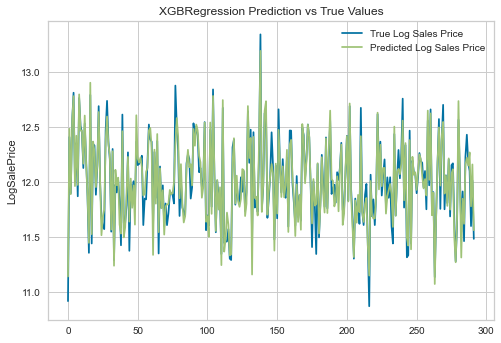

In [111]:
# Plotting the XGBRegression results against the true log sales price:
x_values = [x for x in range(len(y_test))]

sns.lineplot(x=x_values, y=y_test, label='True Log Sales Price')
sns.lineplot(x=x_values, y=xgbr_y_preds, label='Predicted Log Sales Price')
plt.legend()
plt.title("XGBRegression Prediction vs True Values")
plt.show()

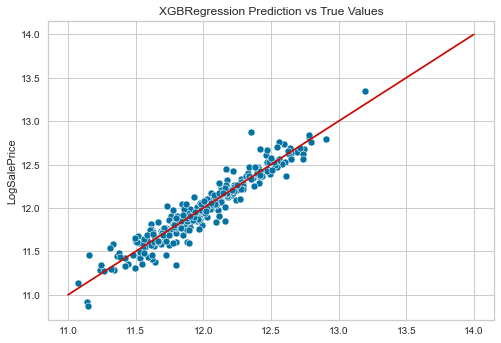

In [112]:
# Plotting the XGBRegression results against the true log sales price:
ax = sns.scatterplot(x=xgbr_y_preds, y=y_test)
ax.plot((11,14),(11,14), color='r')
plt.title("XGBRegression Prediction vs True Values")
plt.show()

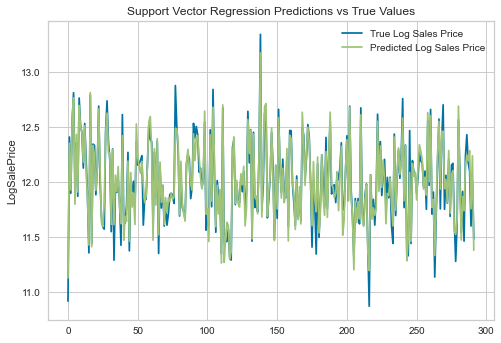

In [113]:
# Plotting the Support Vector Regressor results against the true log sales price:
x_values = [x for x in range(len(y_test))]

sns.lineplot(x=x_values, y=y_test, label='True Log Sales Price')
sns.lineplot(x=x_values, y=svr_y_preds, label='Predicted Log Sales Price')
plt.legend()
plt.title("Support Vector Regression Predictions vs True Values")
plt.show()

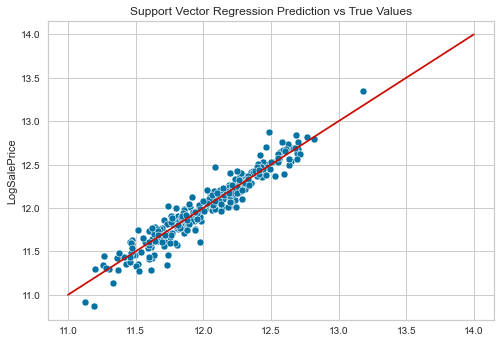

In [114]:
# Plotting the Support Vector Regressor results against the true log sales price:
ax = sns.scatterplot(x=svr_y_preds, y=y_test)
ax.plot((11,14),(11,14), color='r')
plt.title('Support Vector Regression Prediction vs True Values')
plt.show()

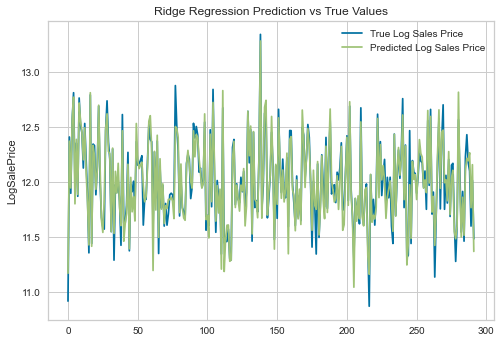

In [115]:
# Plotting the Ridge Regressor results against the true log sales price:
x_values = [x for x in range(len(y_test))]

sns.lineplot(x=x_values, y=y_test, label='True Log Sales Price')
sns.lineplot(x=x_values, y=ridge_y_preds, label='Predicted Log Sales Price')
plt.legend()
plt.title("Ridge Regression Prediction vs True Values")
plt.show()

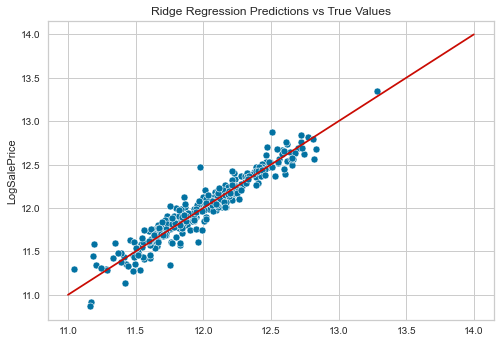

In [116]:
# Plotting the Ridge Regressor results against the true log sales price:
ax = sns.scatterplot(x=ridge_y_preds, y=y_test)
ax.plot((11,14),(11,14), color='r')
plt.title("Ridge Regression Predictions vs True Values")
plt.show()

Based on the analysis done the best model is the Support Vector Regressor with a sigmoid kernel, a gamma of 0.0001 and C of 10. This model gives us an RMSE of 0.108.